In [31]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.




Original Dataset:
      Name   Age Gender   Income        Date
0   Alice   25.0      F    50000  2023-01-01
1      Bob  30.0      M    60000  2023-02-15
2  Charlie   NaN      M  1200000  2023-03-12
3    David  35.0      M    58000  2023-04-01
4      Eva  22.0   None    52000  2023-05-25
5      Bob  30.0      M    60000  2023-02-15
6    Frank  40.0      M    62000  2023-06-30
7    Grace   NaN      F    55000  2023-07-20
8    Henry  27.0      M    59000  2023-08-15
9      Eva  22.0   None    52000  2023-05-25

Missing values per column:
Name      0
Age       2
Gender    2
Income    0
Date      0
dtype: int64

Number of duplicate rows before removal: 2
Number of duplicate rows after removal: 0

Income - Q1: 54250.0, Q3: 60500.0, IQR: 6250.0

Cleaned Dataset:
    Name     Age Gender  Income       Date
0  alice  25.000      F   50000 2023-01-01
1    bob  30.000      M   60000 2023-02-15
3  david  35.000      M   58000 2023-04-01
4    eva  22.000      M   52000 2023-05-25
6  frank  40.000   

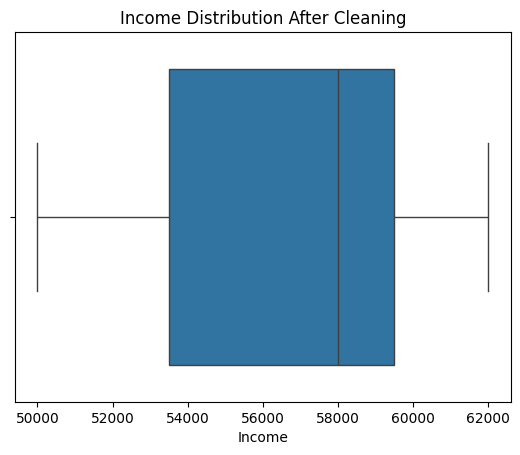

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
# For demonstration, we create a sample dataset
data = {
    'Name': ['Alice ', 'Bob', 'Charlie', 'David', 'Eva', 'Bob', 'Frank', 'Grace', 'Henry', 'Eva'],
    'Age': [25, 30, None, 35, 22, 30, 40, None, 27, 22],
    'Gender': ['F', 'M', 'M', 'M', None, 'M', 'M', 'F', 'M', None],
    'Income': [50000, 60000, 1200000, 58000, 52000, 60000, 62000, 55000, 59000, 52000],  # 1200000 is an outlier
    'Date': ['2023-01-01', '2023-02-15', '2023-03-12', '2023-04-01', '2023-05-25', 
             '2023-02-15', '2023-06-30', '2023-07-20', '2023-08-15', '2023-05-25']
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# -----------------------------
# Step 2: Handle Missing Values
# -----------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Gender with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# -----------------------------
# Step 3: Remove Duplicates
# -----------------------------
print(f"\nNumber of duplicate rows before removal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# -----------------------------
# Step 4: Detect and Handle Outliers in Income using IQR
# -----------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nIncome - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Filter to remove outliers
df = df[(df['Income'] >= Q1 - 1.5 * IQR) & (df['Income'] <= Q3 + 1.5 * IQR)]

# -----------------------------
# Step 5: Standardize Formats
# -----------------------------
df['Name'] = df['Name'].str.strip().str.lower()
df['Date'] = pd.to_datetime(df['Date'])

# -----------------------------
# Final cleaned dataset
# -----------------------------
print("\nCleaned Dataset:")
print(df)

# Optional: Visualize Income after cleaning
sns.boxplot(x=df['Income'])
plt.title('Income Distribution After Cleaning')
plt.show()


In [33]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.



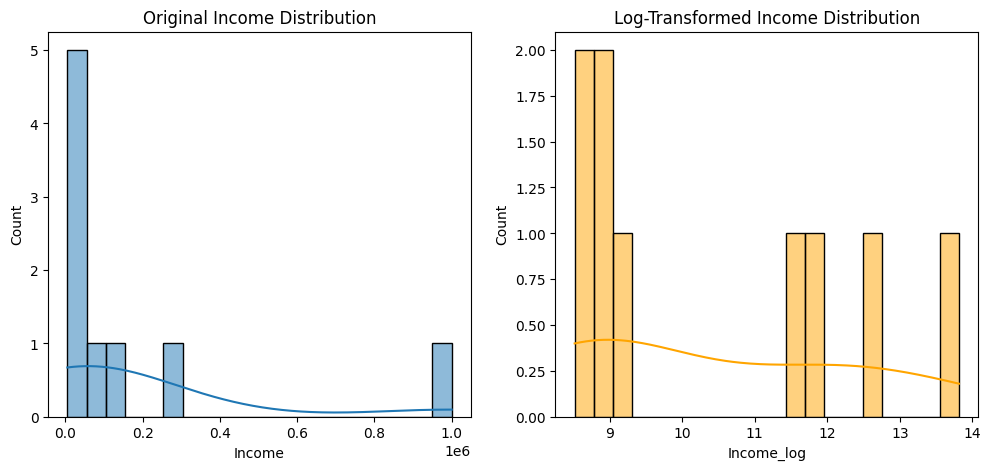

Skewness before log transform: 2.5179
Skewness after log transform: 0.6000


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample skewed data (e.g., Income)
data = {'Income': [5000, 6000, 7000, 8000, 9000, 100000, 150000, 300000, 1000000]}
df = pd.DataFrame(data)

# Check original distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Original Income Distribution')

# Apply log transformation
# Use np.log1p to handle zeros if any: log1p(x) = log(1+x)
df['Income_log'] = np.log(df['Income'])

# Check transformed distribution
plt.subplot(1,2,2)
sns.histplot(df['Income_log'], bins=20, kde=True, color='orange')
plt.title('Log-Transformed Income Distribution')

plt.show()

# Optional: Check skewness before and after
print(f"Skewness before log transform: {df['Income'].skew():.4f}")
print(f"Skewness after log transform: {df['Income_log'].skew():.4f}")


In [35]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.




In [36]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Age': [22, 45, 30, 35, 60],
    'Income': [50000, 80000, 60000, 75000, 120000],
    'Date_of_First_Purchase': ['2015-06-01', '2010-09-15', '2018-01-10', '2012-11-20', '2005-04-30'],
    'Purchase_Amount': [200, 1500, 500, 1200, 2500]
}

df = pd.DataFrame(data)
df['Date_of_First_Purchase'] = pd.to_datetime(df['Date_of_First_Purchase'])

# 1. Create Age Groups
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle_Aged', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 2. Create Income per Age ratio
df['Income_per_Age'] = df['Income'] / df['Age']

# 3. Calculate Customer Tenure (years since first purchase)
current_date = pd.to_datetime('2025-01-01')  # Replace with current date or max date in dataset
df['Customer_Tenure'] = (current_date - df['Date_of_First_Purchase']).dt.days / 365

# 4. Flag high spenders
threshold = 1000
df['Is_High_Spender'] = (df['Purchase_Amount'] > threshold).astype(int)

print(df)


   Age  Income Date_of_First_Purchase  Purchase_Amount    Age_group  \
0   22   50000             2015-06-01              200        Young   
1   45   80000             2010-09-15             1500  Middle_Aged   
2   30   60000             2018-01-10              500        Adult   
3   35   75000             2012-11-20             1200        Adult   
4   60  120000             2005-04-30             2500  Middle_Aged   

   Income_per_Age  Customer_Tenure  Is_High_Spender  
0     2272.727273         9.594521                0  
1     1777.777778        14.306849                1  
2     2000.000000         6.980822                0  
3     2142.857143        12.123288                1  
4     2000.000000        19.687671                1  


In [37]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.




In [38]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Income': [50000, 52000, 60000, 58000, 59000, 1200000, 61000, 55000, 57000, 53000]
}
df = pd.DataFrame(data)

# Calculate mean and std dev
mean_income = df['Income'].mean()
std_income = df['Income'].std()

# Compute Z-scores
df['Z_score'] = (df['Income'] - mean_income) / std_income

# Identify outliers (|Z| > 3)
outliers = df[np.abs(df['Z_score']) > 3]

print("Outliers detected by Z-score method:")
print(outliers)

# Optionally: Remove outliers
df_clean = df[np.abs(df['Z_score']) <= 3]

print("\nDataset after removing outliers:")
print(df_clean)


Outliers detected by Z-score method:
Empty DataFrame
Columns: [Income, Z_score]
Index: []

Dataset after removing outliers:
    Income   Z_score
0    50000 -0.333105
1    52000 -0.327577
2    60000 -0.305462
3    58000 -0.310991
4    59000 -0.308226
5  1200000  2.845909
6    61000 -0.302697
7    55000 -0.319284
8    57000 -0.313755
9    53000 -0.324812


In [39]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.




In [40]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Sample data with missing values
data = {
    'Age': [25, 30, np.nan, 35, 22, 40, np.nan],
    'Income': [50000, 60000, 58000, np.nan, 52000, 62000, 55000],
    'Score': [88, 92, 85, 90, np.nan, 95, 87]
}

df = pd.DataFrame(data)
print("Original data with missing values:")
print(df)

# Initialize KNN Imputer (k=3 neighbors)
imputer = KNNImputer(n_neighbors=3)

# Apply imputation
df_imputed = imputer.fit_transform(df)

# Convert back to DataFrame with original column names
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nData after KNN imputation:")
print(df_imputed)


Original data with missing values:
    Age   Income  Score
0  25.0  50000.0   88.0
1  30.0  60000.0   92.0
2   NaN  58000.0   85.0
3  35.0      NaN   90.0
4  22.0  52000.0    NaN
5  40.0  62000.0   95.0
6   NaN  55000.0   87.0

Data after KNN imputation:
         Age        Income      Score
0  25.000000  50000.000000  88.000000
1  30.000000  60000.000000  92.000000
2  35.000000  58000.000000  85.000000
3  35.000000  57666.666667  90.000000
4  22.000000  52000.000000  88.333333
5  40.000000  62000.000000  95.000000
6  27.333333  55000.000000  87.000000
